#Projeto De Sistemas Inteligentes: AD
> Grupo: Rafael dos Reis de Labio (rrl3), Pedro César Guimarães Rodrigues (pcgr),Lucas Gabriel Ferreira Lima (lgfl),Vinícius Pereira de Araujo (vpa2),João Pedro Barreto de Oliveira Lima (jpbol)



#🔁Importando o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#📑 Importando as bibliotecas usadas e Dataset


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 5

# IMPORTANDO O DATASET DE TREINO
df = pd.read_csv('/content/drive/MyDrive/SI/AD/Datasets/train.csv')
df_teste = pd.read_csv('/content/drive/MyDrive/SI/AD/Datasets/test.csv')


# Primeiro, é importante olhar os dados

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
freq_distribution = df['Survived'].value_counts()
freq_distribution

0    549
1    342
Name: Survived, dtype: int64

Podemos conferir que o dataset não está bem distribuido. Podemos, depois, tentar complementar criar mais casos de sobreviventes.

# Descrição dos Dados:
*   Survived (Sobreviveu): 0 = Não, 1 = Sim
*   Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
*   Sex (Sexo): Sexo do passageiro
*   Age (Idade): Idade em anos
*   Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
*   Parch: Quantidade de pais / crianças a bordo do Titanic
*   Ticket (Bilhete): Número do bilhete de embarque
*   Fare (Tarifa): Tarifa paga pelo Passageiro
*   Cabin (Cabine): Número de cabine
*   Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S =Southampton)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#**🧹Limpeza dos dados**
 Age, Cabin, Embarked  tem informações faltando, então limpar se faz necessario limpar o dataset

In [ ]:
# 1. Completando a coluna de idade com a media delas
# para idade é possivel completar as informações faltando com a media

df['Age'].fillna(value=df['Age'].mean(), inplace= True)

# 2. Removendo a coluna de Cabine:
# pois a maioria não está preenchida

df.dropna(axis=1, thresh= 400, inplace= True)

# 3. Removendo as 2 pessoas sem informação de embarque
# como são apenas 2 é melhor tirar do dataset

df.dropna(inplace= True)

# 4. Removendo Name e Ticket
# Removeremos o nome dos passageiros e os ID's dos tickets comprados, já que espera-se que eles não tenham nenhuma relação com a sobrevivência ou não dos passageiros.

features= ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
df = df[features]

# 5. Transformando as variáveis categóricas
# As colunas "Sex" e "Embarked" precisam ser trocadas para valores, ao invés de categorias. Existem alguns métodos para isso, como Label Encoding, One-Hot Encoder, Custom Mapping.
# Como não estamos tratando de categorias com uma ordem hierarquica, optamos pelo One-Hot Encoder, que transforma as categorias em colunas no dataframe, designando valores binários a elas.

df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
df.head()  # mostrar
df.info()  # Agora o dataset está limpo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Survived    889 non-null    int64  
 6   Sex_female  889 non-null    uint8  
 7   Sex_male    889 non-null    uint8  
 8   Embarked_C  889 non-null    uint8  
 9   Embarked_Q  889 non-null    uint8  
 10  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


# Checando correlação

<Axes: >

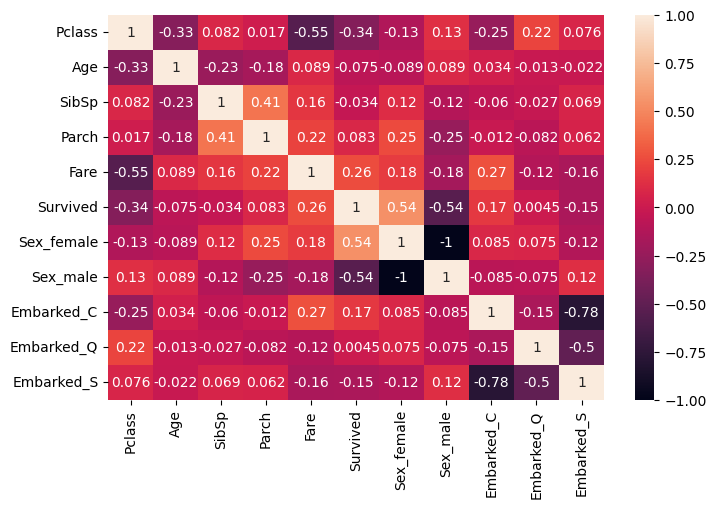

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

# Algumas correlações notáveis:


## 1.   As mulheres sobreviveram muito mais em comparação aos homens (Tal qual Rose e Jack)

## 2.   Pessoas com irmãos e conjugês, muitas vezes também estavam com filhos e/ou pais. Estavam em família

## 3.   Os que pagaram mais (provavelmente os mais ricos), pasmém, também sobreviveram mais.

## 4.   Existe uma correlação notável entre os passageiros que embarcaram em Cherbourg e no preço do ticket que foi pago.

In [ ]:
# Matriz, Atributos e Vetor target
X= df.drop('Survived', axis=1)
Y= df['Survived']

# ✅ 1º Modelo


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Separando nosso dataset em um set de treino e um set de teste

clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.65      0.77      0.71        69

    accuracy                           0.75       178
   macro avg       0.74      0.76      0.75       178
weighted avg       0.76      0.75      0.76       178



<Axes: >

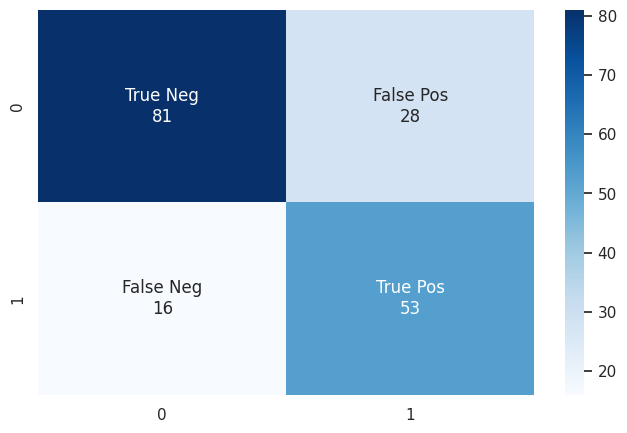

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

Uma das maiores vantagens da utilização de árvores de decisão é a visualização das decisões feitas pelo modelo

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

In [ ]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
classes = ['Died', 'Survived']
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=features,
                           class_names=classes,
                           filled=True, rounded=True, special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

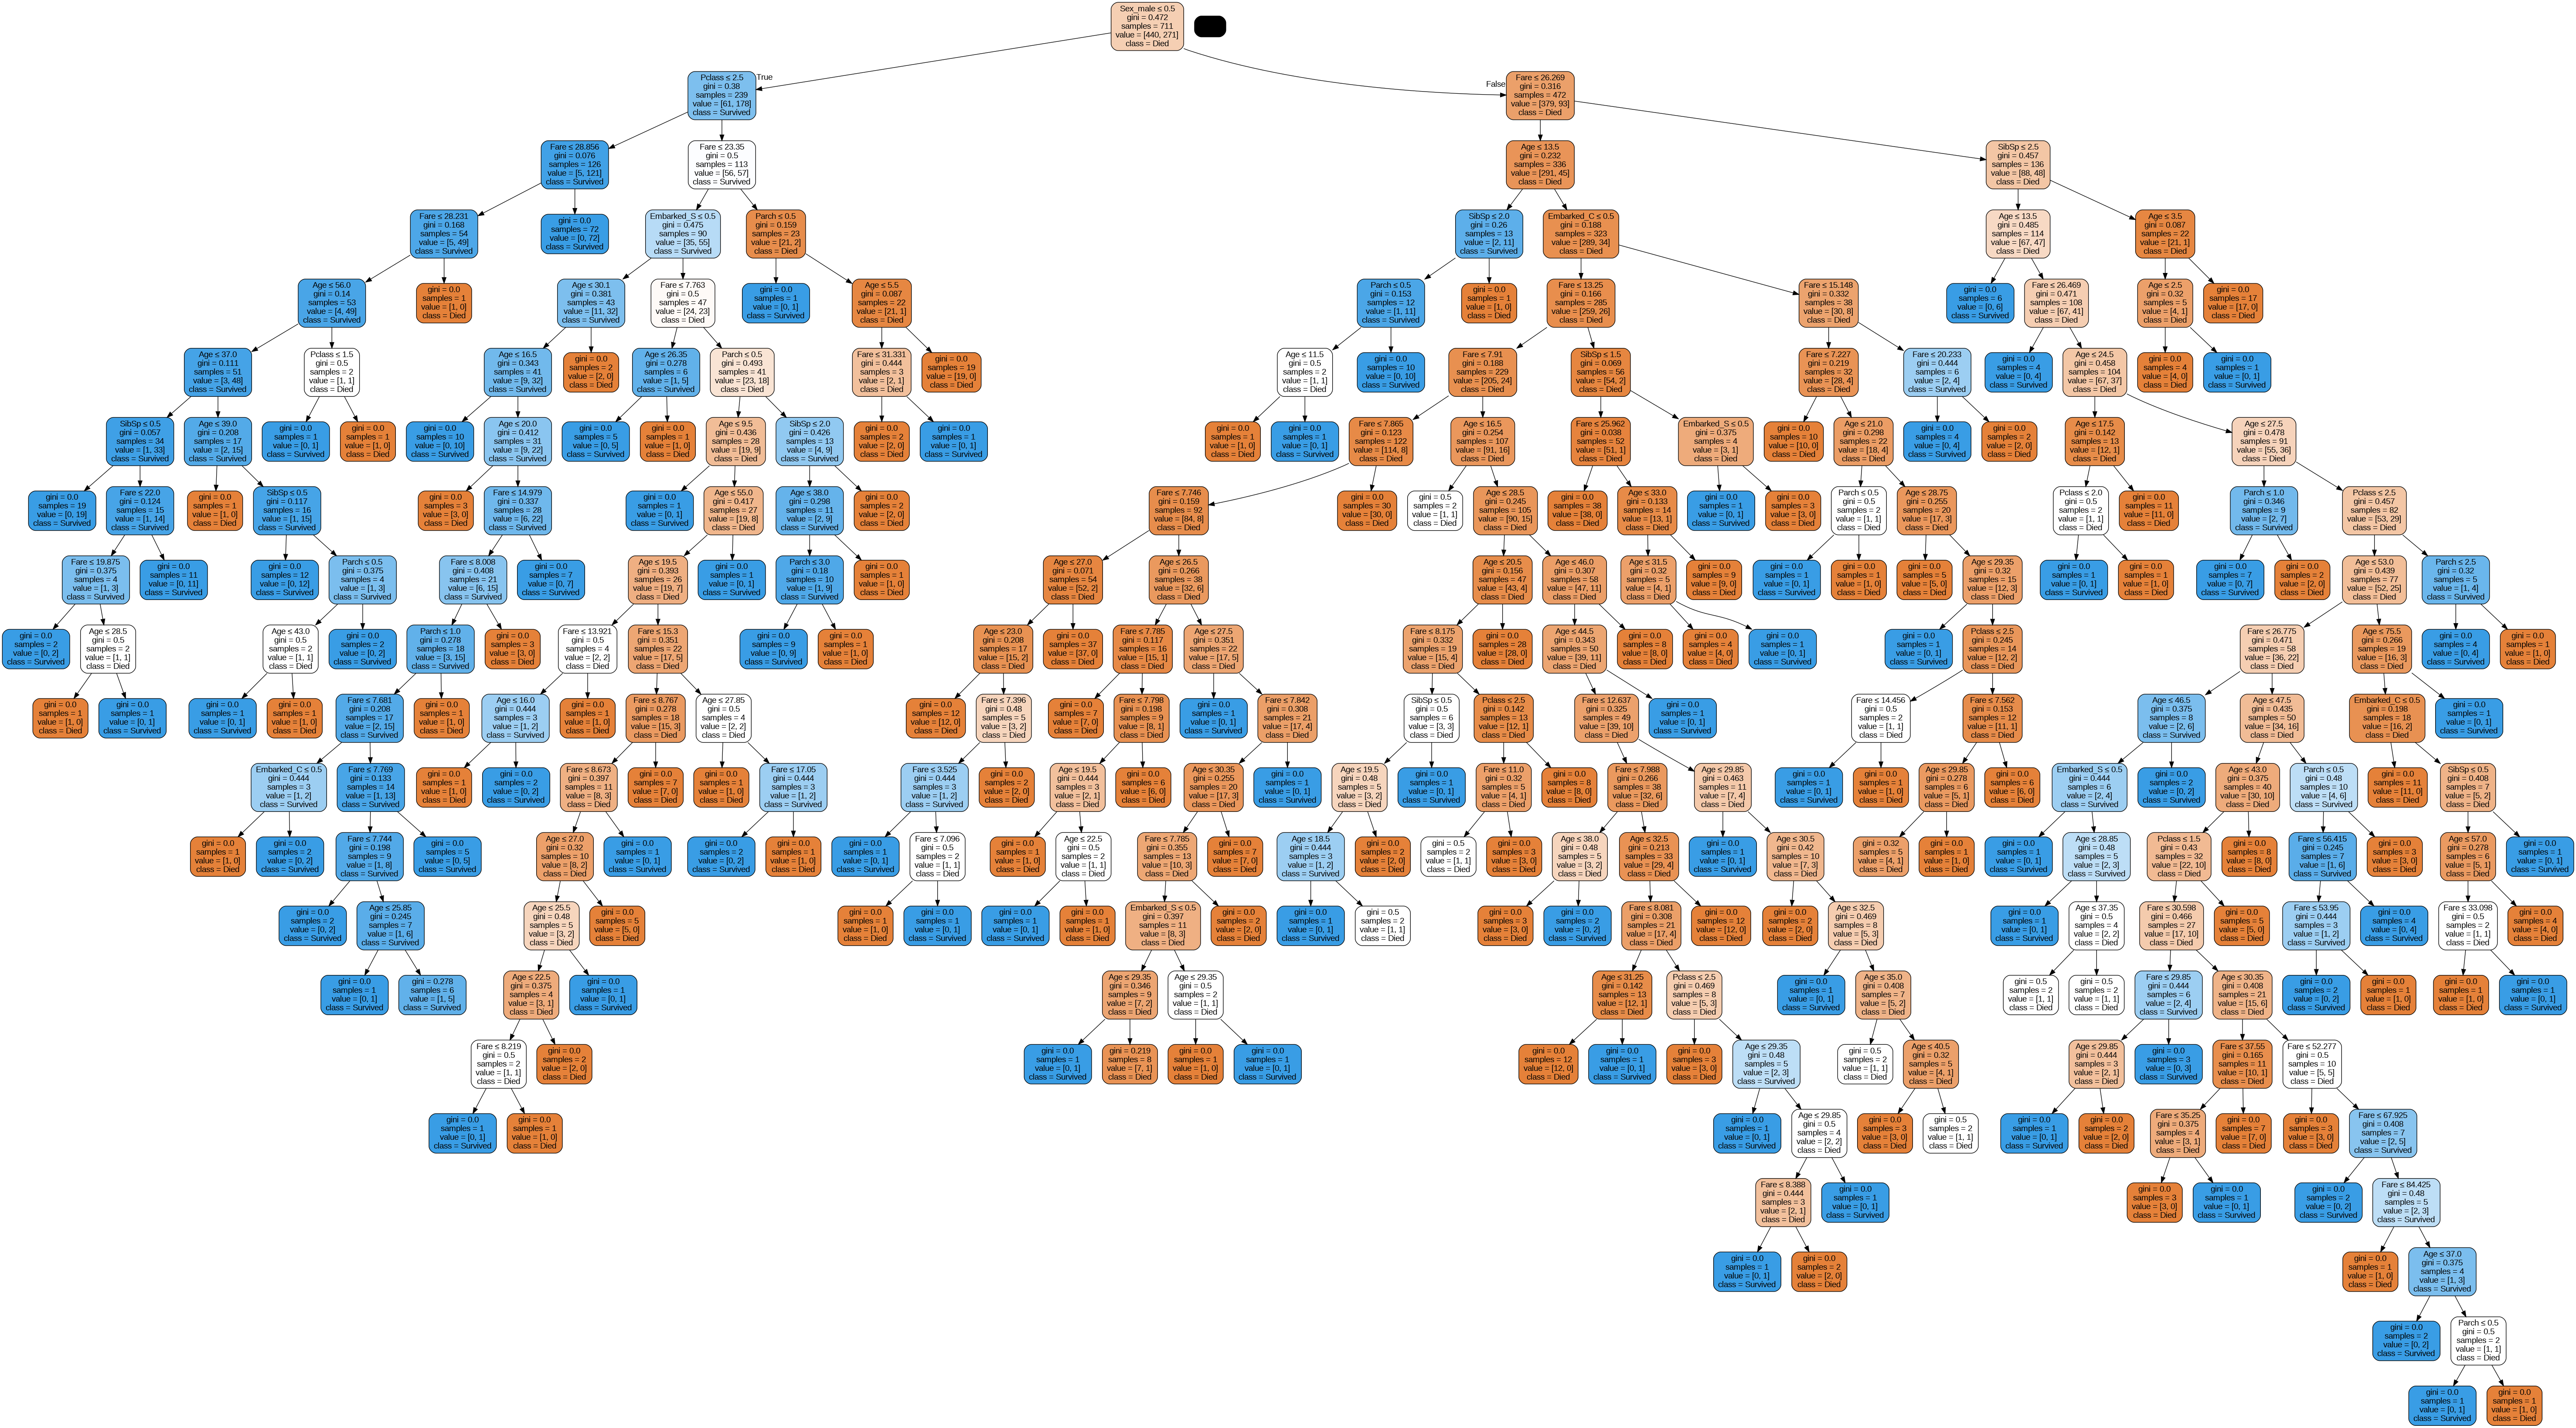

In [ ]:
Image(graph.create_png())

## Resultados
**75%** de F1-Score.

**35%** de erro no caso de falsos positivos.

## Como melhorar?
Podemos expandir os casos de sobrevivência para igualar o dataframe

# Aprimorando Dataframe
Vamos expandir os casos de sobreviventes usando Oversampling.

In [ ]:
from sklearn.utils import resample

majority_class = df[df['Survived'] == 0]
minority_class = df[df['Survived'] == 1]

minority_class_oversampled = resample(minority_class,
                                      replace=True,
                                      n_samples=len(majority_class),
                                      random_state=42)

balanced_df = pd.concat([majority_class, minority_class_oversampled])

In [ ]:
freq_distribution = balanced_df['Survived'].value_counts()
freq_distribution

0    549
1    549
Name: Survived, dtype: int64

Agora, com o dataset redistribuído e com as classes niveladas, vamos retreinar o modelo.

In [ ]:
X= balanced_df.drop('Survived', axis=1)
Y= balanced_df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Treinando com novo dataframe

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       119
           1       0.82      0.88      0.85       101

    accuracy                           0.85       220
   macro avg       0.85      0.86      0.85       220
weighted avg       0.86      0.85      0.85       220



## Resultados
✅ **85%** de F1-Score.

✅ **18%** de erro no caso de falsos positivos.

### Como melhorar?
Agora, podemos tentar ajustar hiperparametros.

# ✅ 2º Modelo

## Ajustando os hiperpâmetros:

Para isso, ultilizaremos um método do scikit-learn, o GridSearchCV, o qual encontra valores ideiais para os hiperparâmetros fornecidos.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X, Y)

print('Best parameters found:\n', grid_search.best_params_)

Best parameters found:
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}


In [ ]:

clf_tuned = DecisionTreeClassifier(max_features = 'auto',
                            ccp_alpha = 0.001,
                            max_depth = 9,
                            criterion = 'entropy')

clf_tuned = clf_tuned.fit(X_train, y_train)

#analisando o Classification report do modelo novo
clf_tuned = clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       119
           1       0.81      0.81      0.81       101

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


## Mostrando o Confusion Matrix

<Axes: >

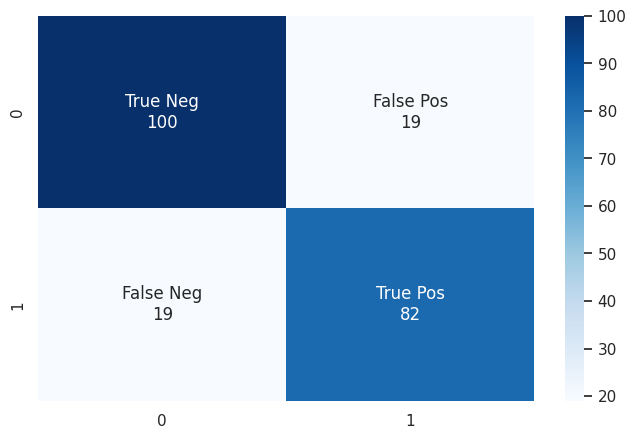

In [ ]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='Blues')


## Testando com max_depth = 7

In [ ]:
clf_tuned = DecisionTreeClassifier(max_features = 'auto',
                            ccp_alpha = 0.001,
                            max_depth = 7,
                            criterion = 'entropy')

clf_tuned = clf_tuned.fit(X_train, y_train)

#analisando o Classification report do modelo novo
clf_tuned = clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       119
           1       0.76      0.79      0.78       101

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



### Analisando Confusion Matrix utilizando o novo max_depth

<Axes: >

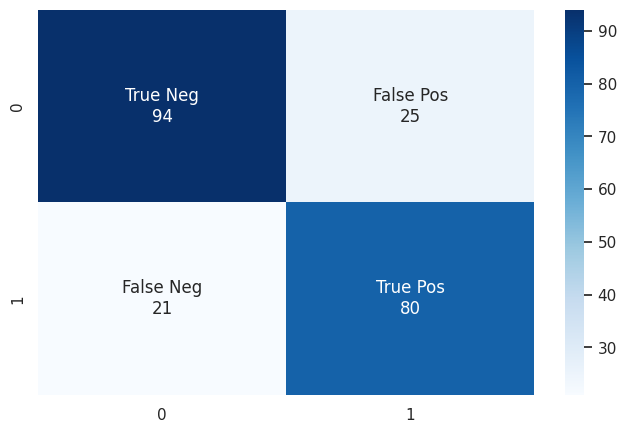

In [ ]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='Blues')

# ✅ 3° Modelo

## 🌳🌳 Ultilizando random Forest

In [ ]:
rf = RandomForestClassifier().fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

# Analisando Classification Report do modelo
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       119
           1       0.83      0.88      0.86       101

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



### Analisando Confusion Matrix

<Axes: >

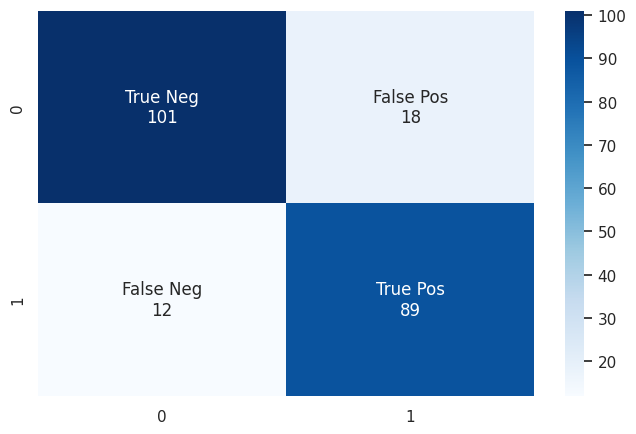

In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_rf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_rf, annot=labels, fmt= '', cmap='Blues')

Analisando a matriz de confusão do modelo


Nota-se uma melhora na acurácia, ao se aplicar o modelo do random Forest em relação ao uso da arvore de decisão. notou-se que ao definir os hiperparametros a acuracia do modelo diminuiu, isso se deve por conta da profundida que foi aplicada, ao diminuir a profundidade dos parâmetros, teve-se uma melhoria do modelo.
Levando a crer que possa ter sido a presença de overfitting no retreino.

In [ ]:
feature_names = X.columns
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

for index in sorted_idx:
    print(f"{feature_names[index]}: {importances[index]:.4f}")


Age: 0.2637
Fare: 0.2597
Sex_male: 0.1483
Sex_female: 0.1204
Pclass: 0.0752
SibSp: 0.0492
Parch: 0.0413
Embarked_C: 0.0193
Embarked_S: 0.0155
Embarked_Q: 0.0074
